In [37]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [39]:
stair_run_dir = "trained_wts/unbiased_stair/2023-11-22T17:17:50"
iter_range, stair_losses = pickle.load(open(Path(stair_run_dir) / "losses.pkl", "rb"))
_, stair_coeffs = pickle.load(open(Path(stair_run_dir) / "coeffs.pkl", "rb"))

In [40]:
parity_run_dir = "trained_wts/unbiased_parity/2023-11-22T17:20:42"
iter_range, parity_losses = pickle.load(open(Path(parity_run_dir) / "losses.pkl", "rb"))
_, parity_coeffs = pickle.load(open(Path(parity_run_dir) / "coeffs.pkl", "rb"))

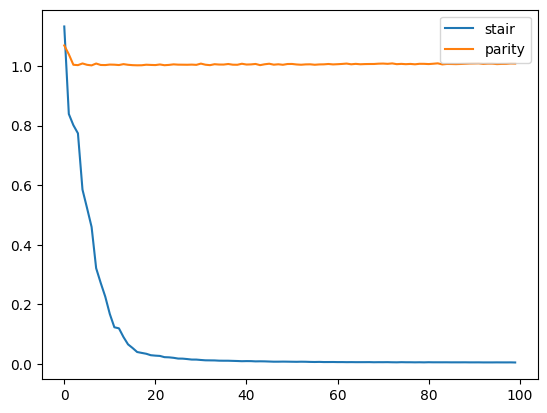

In [41]:
plt.plot(stair_losses, label = "stair")
plt.plot(parity_losses, label = "parity")
plt.legend()
plt.show()

In [42]:
import torch

In [43]:
stair_coeffs = torch.Tensor(stair_coeffs)
parity_coeffs = torch.Tensor(parity_coeffs)

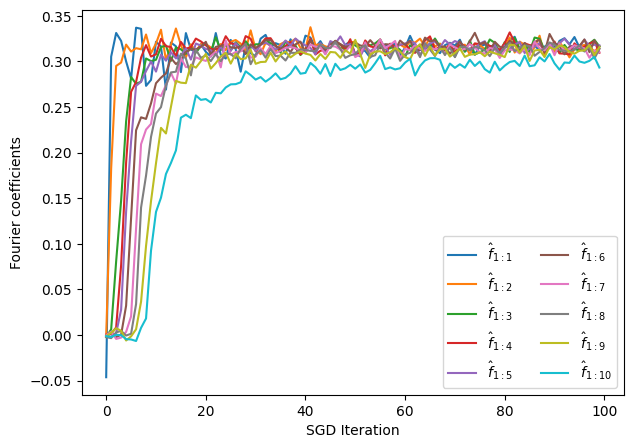

In [44]:
plt.figure(figsize=(7,5))
plt.xlabel("SGD Iteration")
plt.ylabel("Fourier coefficients")
for i in range(1, stair_coeffs.shape[1]):
    plt.plot(
        stair_coeffs[:,i], 
        label = "$\hat{f}_{1:" + str(i) + "}$",
    )

plt.legend(ncol = 2)
plt.show()

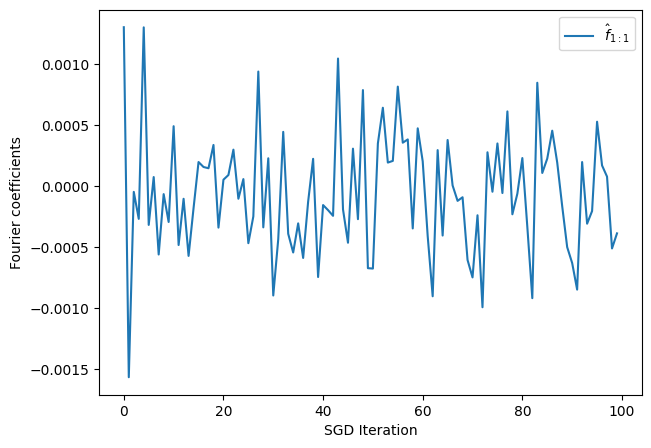

In [45]:
plt.figure(figsize=(7,5))
plt.xlabel("SGD Iteration")
plt.ylabel("Fourier coefficients")
for i in range(1, parity_coeffs.shape[1]):
    plt.plot(
        parity_coeffs[:,i], 
        label = "$\hat{f}_{1:" + str(i) + "}$",
    )

plt.legend(ncol = 2)
plt.show()

In [60]:
net = pickle.load(open("trained_wts/unbiased_custom/2023-11-23T14:02:19/net/9000.pkl", "rb"))

In [62]:
net.linears[0].weight

Parameter containing:
tensor([[-1.5154e+00,  1.4393e-01,  2.7201e-07,  5.8349e-01],
        [ 1.0829e+00, -1.9933e-05, -7.9780e-01, -4.3063e-01],
        [ 2.5602e-02, -9.0551e-01,  1.2445e-01, -1.0081e+00],
        [ 6.5779e-01, -1.2055e+00,  5.4055e-02,  8.7579e-01]],
       requires_grad=True)

In [67]:
net.linears[0].bias

Parameter containing:
tensor([ 0.7735, -0.0656, -0.0929, -0.0105], requires_grad=True)

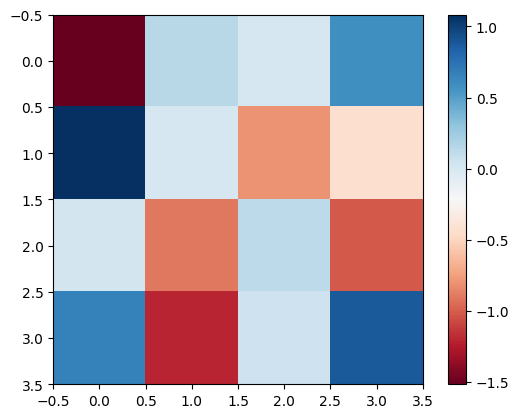

In [68]:
plt.imshow(net.linears[0].weight.detach().numpy(), cmap="RdBu")
plt.colorbar()


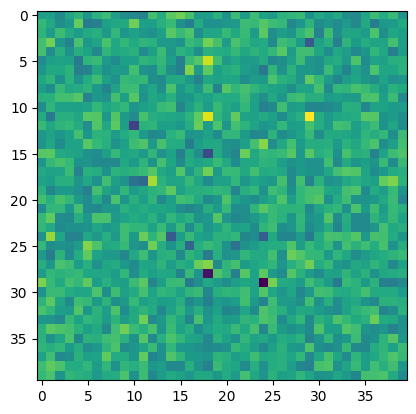

In [56]:
plt.imshow(net.linears[1].weight.detach().numpy())


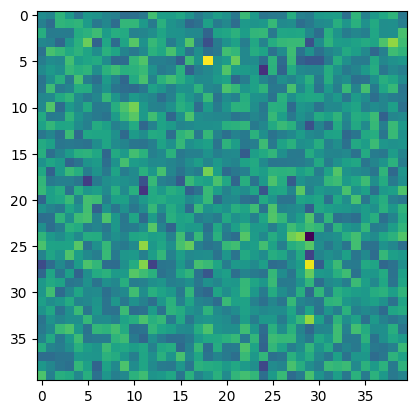

In [57]:
plt.imshow(net.linears[2].weight.detach().numpy())


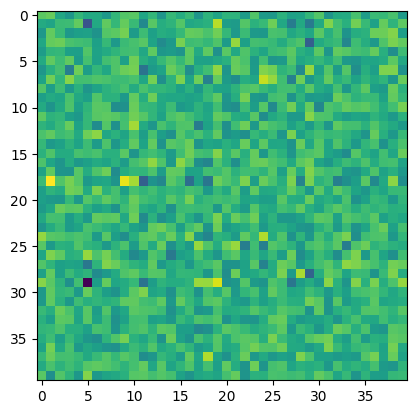

In [58]:
plt.imshow(net.linears[3].weight.detach().numpy())


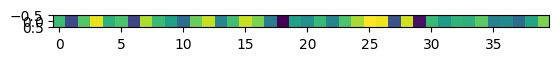

In [59]:
plt.imshow(net.linears[4].weight.detach().numpy())


In [104]:
fourier_fn = {
    (1,): 1,
    # (2,): 1,
    (0, 1): 1,
    # (0, 2): 1,
    (0, 1, 3): 1,
    (1, 2): 1,
}

In [105]:
import itertools 

In [106]:
from utils import convert_fourier_fn_to_eval_fn

In [107]:
eval_fn = convert_fourier_fn_to_eval_fn(fourier_fn)
t = torch.Tensor([
    eval_fn(torch.Tensor(x))
    for x in itertools.product([-1, 1], repeat=4)
])
print(t)
print(torch.mean(t))

tensor([ 0.,  2., -2.,  0.,  0., -2.,  2.,  0.,  0., -2., -2., -4.,  0.,  2.,
         2.,  4.])
tensor(0.)
